In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.neighbors import LocalOutlierFactor

pd.set_option('display.max_columns', None)  # Exibir todas as colunas

#OBS: Necessário possuir scikit-learn instalado! Para instalar: pip install -U scikit-learn

In [2]:
#Selecionar arquivo CSV usando seleção de janela do Windows (Janela pode aparecer por baixo da janela do navegador!)
import tkinter as tk
from tkinter import filedialog
root = tk.Tk()
root.withdraw()
caminhoArquivoDados = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])

#Carregar dataset para dataframe
df_original = pd.read_csv(caminhoArquivoDados)

In [3]:
#################################### ANÁLISE EXPLORATÓRIA ####################################

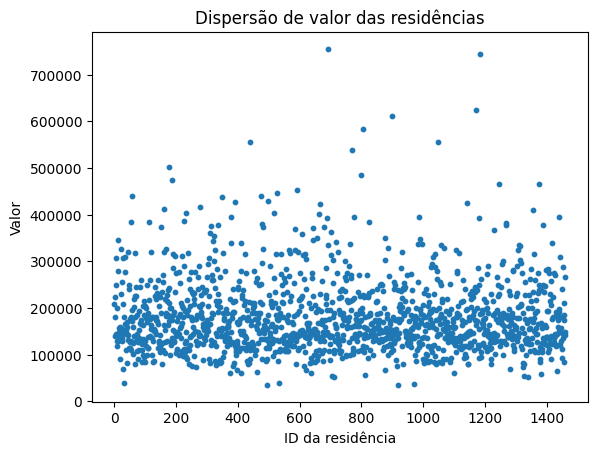

In [4]:
##### Entendendo os valores das casas em um gráfico de dispersão

# Plotar o gráfico de dispersão de valores das casas
x = df_original['Id']
y = df_original['SalePrice']
#cores = np.random.rand(len(x), 3)

plt.scatter(x, y, s=10)

# Adicionar títulos e rótulos dos eixos
plt.title('Dispersão de valor das residências')
plt.xlabel('ID da residência')
plt.ylabel('Valor')
plt.show()


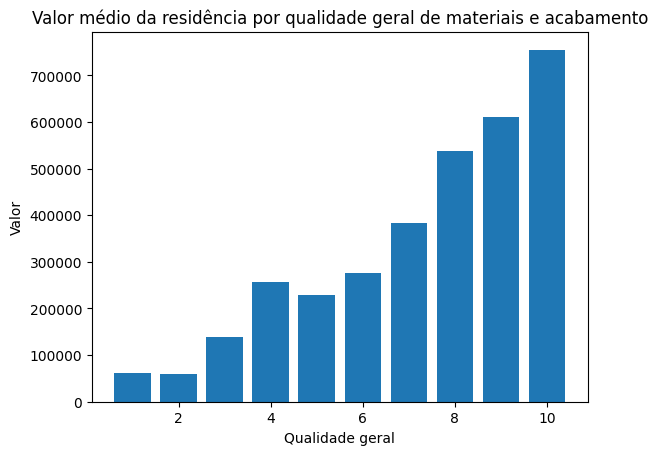

In [5]:
##### Pergunta: Qual o preço médio das casas baseado na sua qualidade de material e acabamento?

# Plotar gráfico de barras de preço em relação a qualidade geral de materiais e acabamento
plt.bar(df_original['OverallQual'], df_original['SalePrice'])

# Adicionando título e rótulos dos eixos
plt.title('Valor médio da residência por qualidade geral de materiais e acabamento')
plt.xlabel('Qualidade geral')
plt.ylabel('Valor')

# Exibição do gráfico
plt.show()

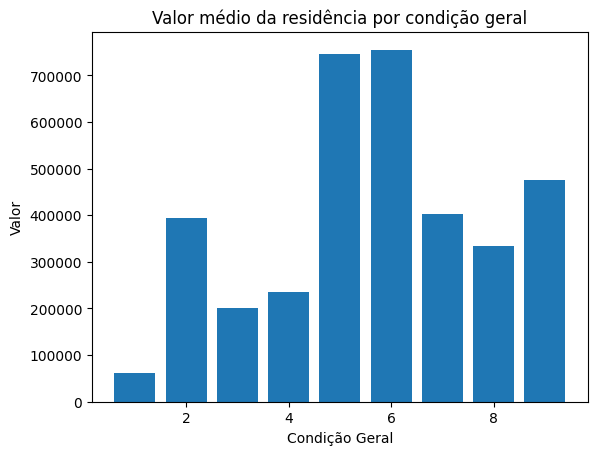

In [6]:
##### Pergunta: Qual o preço médio das casas baseado na sua condição geral?

# Plotar gráfico de barras de preço em relação a condição
plt.bar(df_original['OverallCond'], df_original['SalePrice'])

# Adicionando título e rótulos dos eixos
plt.title('Valor médio da residência por condição geral')
plt.xlabel('Condição Geral')
plt.ylabel('Valor')

# Exibição do gráfico
plt.show()

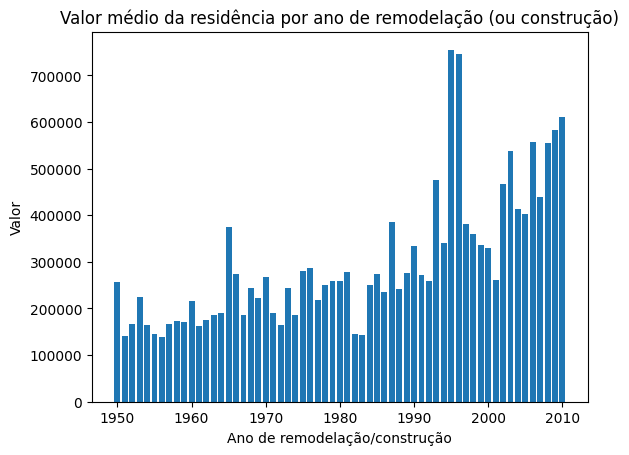

In [7]:
##### Pergunta: Qual o preço médio das casas baseado no ano de remodelação?

# Plotar gráfico de barras de preço em relação ao ano de remodelação (ou construção em casas nunca remodeladas)
plt.bar(df_original['YearRemodAdd'], df_original['SalePrice'])

# Adicionando título e rótulos dos eixos
plt.title('Valor médio da residência por ano de remodelação (ou construção)')
plt.xlabel('Ano de remodelação/construção')
plt.ylabel('Valor')

# Exibição do gráfico
plt.show()

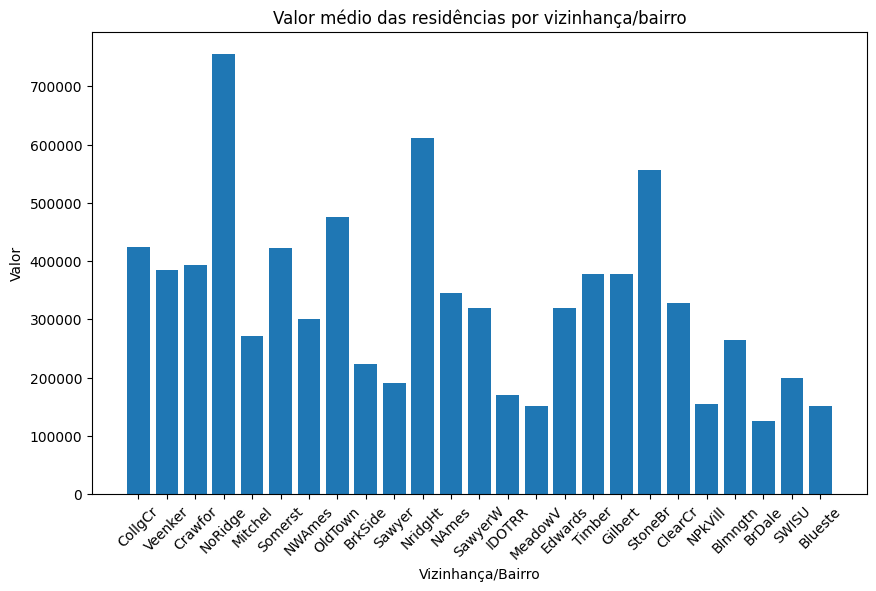

In [8]:
##### Pergunta: Qual o preço médio das casas baseado na sua vizinhança/bairro?

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar gráfico de barras de preço em relação a vizinhança
plt.bar(df_original['Neighborhood'], df_original['SalePrice'])

# Adicionando título e rótulos dos eixos
plt.title('Valor médio das residências por vizinhança/bairro')
plt.xlabel('Vizinhança/Bairro')
plt.ylabel('Valor')

# Rotacionar rótulos do eixo x
plt.xticks(rotation=45)

# Exibição do gráfico
plt.show()

In [9]:
#################################### FEATURING ENGINEERING ####################################

In [10]:
########## Remover casas com valores outliers

# Calcular o intervalo interquartil
Q1 = df_original['SalePrice'].quantile(0.25)
Q3 = df_original['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
df_cleaned = df_original[(df_original['SalePrice'] >= limite_inferior) & (df_original['SalePrice'] <= limite_superior)]
df_cleaned

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

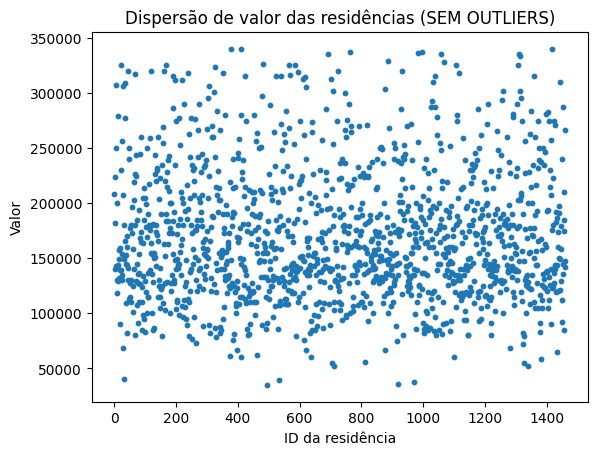

In [11]:
########## Visualizar gráfico de dispersão de valores das casas sem outliers

# Plotar o gráfico de dispersão de valores das casas
x = df_cleaned['Id']
y = df_cleaned['SalePrice']

plt.scatter(x, y, s=10)

# Adicionar títulos e rótulos dos eixos
plt.title('Dispersão de valor das residências (SEM OUTLIERS)')
plt.xlabel('ID da residência')
plt.ylabel('Valor')
plt.show()

In [12]:
########## Aplicar LabelEncoder nos atributos categóricos

df_cleaned_LabelEncoder = df_cleaned.copy(deep=True)

# Identificar as colunas com dados categóricos
colunasAtributosCategoricos = df_cleaned.select_dtypes(include=['object']).columns

# Copiar apenas as colunas categóricas para o novo DataFrame
df_categoricos = df_cleaned[colunasAtributosCategoricos].copy()

# Aplicar o LabelEncoder nas colunas categóricas
label_encoder = LabelEncoder()
for column in colunasAtributosCategoricos:
    df_categoricos[column] = label_encoder.fit_transform(df_categoricos[column])

# Substituir as colunas categóricas em df_cleaned_LabelEncoder
for column in colunasAtributosCategoricos:
    df_cleaned_LabelEncoder[column] = df_categoricos[column]

df_cleaned_LabelEncoder.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,250000


In [13]:
########## Preencher os valores ausentes com a média

#Visualizar linhas com NaN
#df_nan_rows = df_cleaned_LabelEncoder[df_cleaned_LabelEncoder.isnull().any(axis=1)]


df_cleaned_LabelEncoder = df_cleaned_LabelEncoder.fillna(df_cleaned_LabelEncoder.mean())

In [14]:
#################################### APRENDIZAGEM SUPERVISIONADA ####################################

In [15]:
#################### Treinar um modelo de regressão linear múltipla

# Dividir o dataframe em recursos (X) e alvo (y)
X = df_cleaned_LabelEncoder.drop(['SalePrice'], axis=1)
y = df_cleaned_LabelEncoder['SalePrice']

# Treinar o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X, y)

# Fazer previsões com o modelo treinado
y_pred = model.predict(X)

# Calcular as métricas de avaliação
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Imprimir as métricas de avaliação
print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared (R²): 0.8550094706619848
Mean Absolute Error (MAE): 15412.106930554848
Root Mean Squared Error (RMSE): 22545.363299990953


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       193
           1       0.92      0.94      0.93       227

    accuracy                           0.93       420
   macro avg       0.93      0.92      0.93       420
weighted avg       0.93      0.93      0.93       420

Number of mislabeled points out of a total 420 points : 31


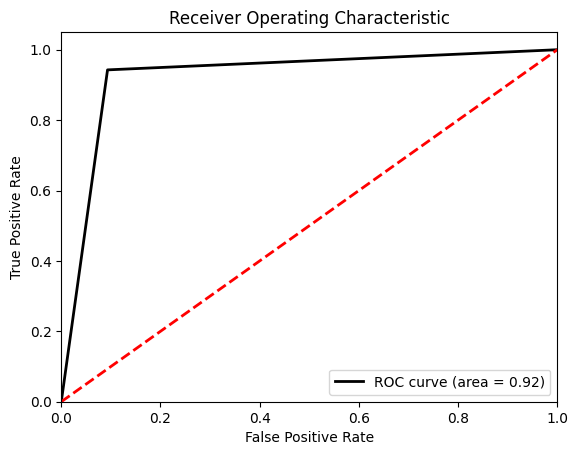

In [16]:
################## TREINAR MODELO DE CLASSIFICAÇÃO NAIVE BAYES

# Criar a nova coluna "CategoriaPreco"
df_cleaned_NB = df_cleaned_LabelEncoder
media = df_cleaned_NB['SalePrice'].mean()
df_cleaned_NB["CategoriaPreco"] = np.where(df_cleaned_NB["SalePrice"] > media, "Alto", "Baixo")

# Aplicar o LabelEncoder na coluna "CategoriaPreco"
label_encoder = LabelEncoder()
df_cleaned_NB["CategoriaPreco"] = label_encoder.fit_transform(df_cleaned_NB["CategoriaPreco"])


X_train, X_test, y_train, y_test = train_test_split(df_cleaned_NB.drop('CategoriaPreco', axis=1), df_cleaned_NB['CategoriaPreco'], test_size=0.3, random_state=0)

# Criar objeto do tipo GaussianNB
gnb = GaussianNB()

# Treinar o modelo com os dados de treino
gnb.fit(X_train, y_train)

# Fazer a previsão do status dos dados de teste
y_pred = gnb.predict(X_test)

# Exibir um relatório de classificação
print(classification_report(y_test, y_pred))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

# Calcular a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [17]:
#################################### APRENDIZAGEM NÃO SUPERVISIONADA ####################################

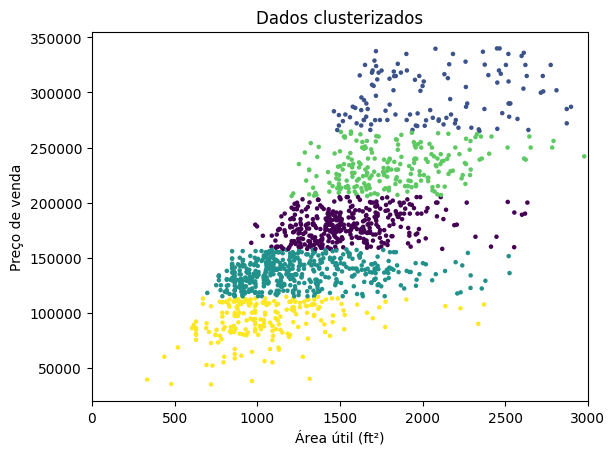

In [18]:
################## Clusterização K-MEANS

# Identificando padrões de preço com base na área útil da residência (nível do solo)

df_cleaned_kmeans = df_cleaned_LabelEncoder.copy(deep=True)

# Criar o modelo K-means com 5 clusters e definir n_init como 10
kmeans = KMeans(n_clusters=5, n_init=10)

# Treinar o modelo com os dados
kmeans.fit(df_cleaned_kmeans)

# Adicionar as previsões do modelo aos dados
df_cleaned_kmeans['cluster'] = kmeans.predict(df_cleaned_kmeans)

# Plotar os dados com as cores dos clusters
plt.scatter(df_cleaned_kmeans['GrLivArea'], df_cleaned_kmeans['SalePrice'], c=df_cleaned_kmeans['cluster'], s=5)

plt.xlim(0, 3000)
plt.xlabel('Área útil (ft²)')
plt.ylabel('Preço de venda')
plt.title('Dados clusterizados')
plt.show()


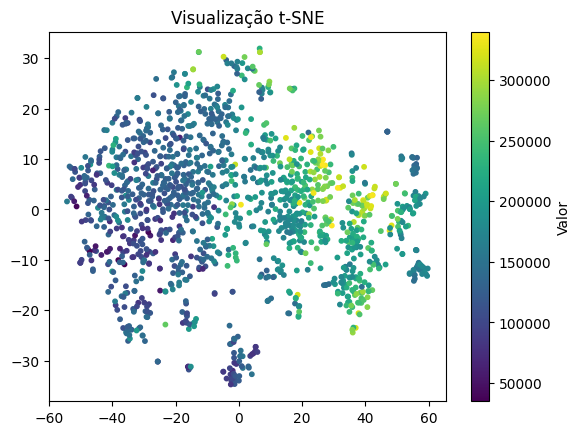

In [19]:
################## Redução de dimensionalidade t-SNE

# Carregando o dataset
caracteristicas = df_cleaned_LabelEncoder.drop('SalePrice', axis=1)
valores = df_cleaned_LabelEncoder['SalePrice']

X, y = caracteristicas, valores
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# Definindo o modelo e ajustando-o aos dados
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_norm)

# Plotando os resultados
plt.scatter(X_tsne[:, 0], X_tsne[:, 1] , c=y, s=10)
plt.colorbar(label='Valor')
plt.title('Visualização t-SNE')
plt.show()

In [20]:
################## Análise de outliers LOF

# Atribuir conjunto de dados
X = df_cleaned_LabelEncoder

# Criação de uma instância do algoritmo LOF
lof = LocalOutlierFactor(n_neighbors=2)

# Ajuste do modelo aos dados e previsão dos rótulos dos outliers
y_pred = lof.fit_predict(X)

# Impressão dos rótulos dos outliers (-1 indica um outlier)
#y_pred_list = y_pred.tolist()
#print(y_pred_list)

# Contagem dos valores
contagem = np.bincount(np.where(y_pred == -1, 0, 1))

# Exibição da contagem
print(f"Quantidade de outliers: {contagem[0]}")
print(f"Quantidade de amostras não outliers: {contagem[1]}")

Quantidade de outliers: 81
Quantidade de amostras não outliers: 1318
